Import and load data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Media_Connections.csv to Social_Media_Connections.csv


In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.linalg import eigh

In [ ]:
# Load data
df = pd.read_csv(io.BytesIO(uploaded['Social_Media_Connections.csv']))
print(df)

      source_user_id  target_user_id
0                  1             522
1                  1             942
2                  1             742
3                  1             981
4                  1             412
...              ...             ...
5016             998             950
5017             999             765
5018             999             688
5019            1000             493
5020            1000             104

[5021 rows x 2 columns]


Degree Matrix

In [ ]:
# Combine source and target user ids and count the occurrences of each user id to get the degree
all_user_ids = pd.concat([df['source_user_id'], df['target_user_id']])
degree_count = all_user_ids.value_counts()
degree_count

913    21
655    20
599    20
767    19
462    19
       ..
624     2
837     2
637     2
592     2
619     1
Name: count, Length: 998, dtype: int64

In [ ]:
# Create a DataFrame with user ids and their corresponding degree
degree_df = pd.DataFrame({'user_id': degree_count.index, 'degree': degree_count.values})
degree_df

,user_id,degree
0,913,21
1,655,20
2,599,20
3,767,19
4,462,19
...,...,...
993,624,2
994,837,2
995,637,2
996,592,2


In [ ]:
# Since we might have user ids with no connections (degree 0), create a full list of user ids
all_user_ids_unique = pd.unique(all_user_ids)
all_user_ids_unique.shape

(998,)

In [ ]:
# Make sure all user ids are present in the degree DataFrame
degree_df_full = degree_df.set_index('user_id').reindex(all_user_ids_unique, fill_value=0)
degree_df_full

,degree
user_id,
1,13
2,11
3,13
4,15
5,10
...,...
967,4
977,3
951,3


In [ ]:
# Now create the degree matrix D as a diagonal matrix
D = np.diag(degree_df_full['degree'].sort_index())

In [ ]:
print(D)

[[13  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  5]]


Adjacency Matrix

In [ ]:
# Proceed with creating the user_to_index mapping and adjacency matrix
unique_users = pd.unique(df[['source_user_id', 'target_user_id']].values.ravel('K'))
user_to_index = {user_id: index for index, user_id in enumerate(unique_users)}
print("User to index mapping:", user_to_index)

User to index mapping: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 14: 12, 15: 13, 16: 14, 17: 15, 18: 16, 19: 17, 20: 18, 21: 19, 22: 20, 23: 21, 24: 22, 25: 23, 26: 24, 27: 25, 28: 26, 29: 27, 30: 28, 31: 29, 32: 30, 33: 31, 34: 32, 35: 33, 36: 34, 37: 35, 38: 36, 39: 37, 41: 38, 42: 39, 43: 40, 44: 41, 45: 42, 46: 43, 47: 44, 48: 45, 49: 46, 50: 47, 51: 48, 52: 49, 53: 50, 54: 51, 55: 52, 56: 53, 57: 54, 58: 55, 59: 56, 60: 57, 61: 58, 62: 59, 63: 60, 65: 61, 66: 62, 67: 63, 68: 64, 69: 65, 70: 66, 71: 67, 72: 68, 73: 69, 74: 70, 75: 71, 76: 72, 77: 73, 78: 74, 79: 75, 80: 76, 81: 77, 83: 78, 84: 79, 85: 80, 86: 81, 87: 82, 89: 83, 90: 84, 91: 85, 92: 86, 93: 87, 94: 88, 95: 89, 96: 90, 97: 91, 98: 92, 99: 93, 100: 94, 101: 95, 102: 96, 103: 97, 104: 98, 105: 99, 107: 100, 108: 101, 109: 102, 110: 103, 112: 104, 113: 105, 114: 106, 115: 107, 116: 108, 117: 109, 118: 110, 120: 111, 122: 112, 124: 113, 125: 114, 126: 115, 127: 116, 128: 117, 129: 118,

In [ ]:
# Initialize an empty adjacency matrix
A = np.zeros((len(unique_users), len(unique_users)), dtype=int)

In [ ]:
# Fill the adjacency matrix based on connections
for _, row in df.iterrows():
    source_index = user_to_index.get(row['source_user_id'])
    target_index = user_to_index.get(row['target_user_id'])
    if source_index is not None and target_index is not None:
        A[source_index][target_index] = 1
        A[target_index][source_index] = 1

In [ ]:
if np.any(A):
    print("There are non-zero entries in the matrix.")
else:
    print("The matrix is still all zero.")

There are non-zero entries in the matrix.


In [ ]:
all_user_ids = pd.unique(df[['source_user_id', 'target_user_id']].values.ravel('K'))
print("All user IDs:", sorted(all_user_ids))
print("User to index mapping:", user_to_index)

# Check if all user IDs are in the mapping and vice versa
if set(all_user_ids) == set(user_to_index.keys()):
    print("Mapping is correctly set up.")
else:
    print("Mismatch in user IDs and mapping.")

All user IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
# Check to see if the Matrix actually has ones in it
print(A[60:71, 60:71])

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]]


Graph Laplacian Matrix

In [ ]:
L = D - A
print(L)

[[13  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  5]]


Spectral Clustering

In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(L)
# Sort eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [ ]:
# Choose the number of clusters
k = 5

In [ ]:
# Select the first k smallest non-zero eigenvalues' eigenvectors
# Avoiding the first eigenvector (corresponding to the eigenvalue 0)
feature_matrix = eigenvectors[:, 1:k+1]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

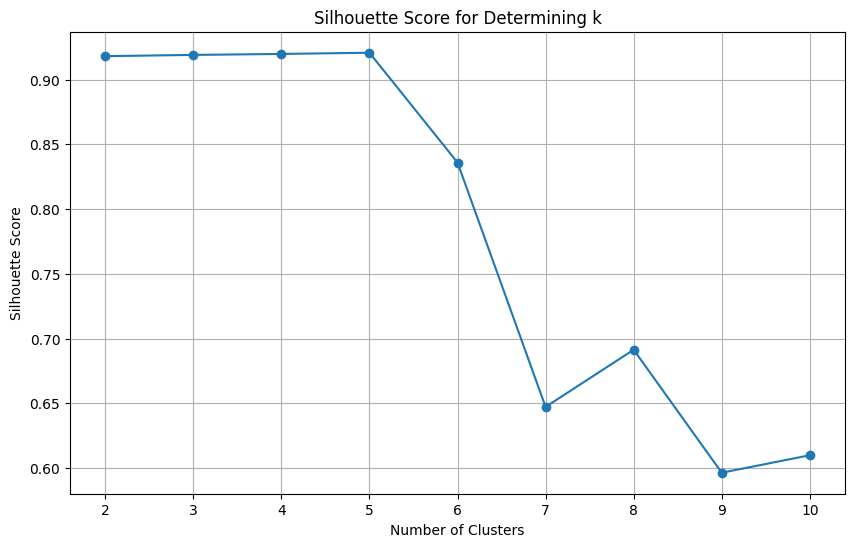

In [ ]:
# Compute silhouette scores to determine the optimal number of clusters
silhouette_scores = []
range_clusters = range(2, 11)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(feature_matrix)
    score = silhouette_score(feature_matrix, labels)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Determining k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
# Choose the number of clusters based on the highest silhouette score
optimal_clusters = range_clusters[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_clusters)

Optimal number of clusters: 5


In [ ]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
clusters = kmeans.fit_predict(feature_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Mapping clusters to user IDs
cluster_assignment = dict(zip(all_user_ids, clusters))
print("Cluster assignment:", cluster_assignment)

Cluster assignment: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 107: 0, 108: 0, 109: 0, 110: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 120: 0, 122: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 138: 0, 139: 0, 140: 0, 141: 0, 142: 0, 143: 0, 144: 0, 145: 0, 146: 0, 14

Cluster assignment: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 107: 0, 108: 0, 109: 0, 110: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 120: 0, 122: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 138: 0, 139: 0, 140: 0, 141: 0, 142: 0, 143: 0, 144: 0, 145: 0, 146: 0, 147: 0, 148: 0, 149: 0, 150: 0, 152: 0, 153: 0, 154: 0, 157: 0, 158: 0, 159: 0, 160: 0, 161: 0, 163: 0, 164: 0, 165: 0, 167: 0, 168: 0, 169: 0, 170: 0, 171: 0, 173: 0, 174: 0, 175: 0, 179: 0, 180: 0, 181: 0, 182: 0, 184: 0, 185: 0, 186: 0, 187: 0, 188: 0, 189: 0, 190: 0, 191: 0, 193: 0, 195: 0, 197: 0, 198: 0, 199: 0, 200: 0, 201: 0, 202: 3, 203: 0, 204: 0, 205: 0, 206: 0, 207: 0, 209: 0, 210: 0, 211: 0, 212: 0, 213: 0, 214: 0, 215: 0, 216: 0, 217: 0, 218: 0, 219: 0, 220: 0, 221: 0, 222: 0, 223: 0, 224: 0, 225: 0, 226: 0, 227: 0, 228: 0, 229: 0, 230: 0, 231: 0, 232: 0, 233: 0, 234: 0, 235: 0, 236: 0, 237: 0, 238: 0, 239: 0, 240: 0, 241: 0, 242: 0, 243: 0, 244: 0, 246: 0, 247: 0, 248: 0, 249: 0, 250: 0, 251: 0, 252: 0, 253: 0, 254: 0, 255: 0, 256: 0, 258: 0, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 0, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 0, 274: 0, 275: 0, 276: 0, 277: 0, 278: 0, 279: 0, 280: 0, 281: 0, 282: 0, 283: 0, 284: 0, 285: 0, 287: 0, 288: 0, 289: 0, 290: 0, 291: 0, 292: 0, 293: 0, 294: 0, 296: 0, 297: 0, 298: 0, 299: 0, 300: 0, 301: 0, 302: 0, 303: 0, 304: 0, 305: 0, 307: 0, 308: 0, 309: 0, 310: 0, 311: 0, 312: 0, 313: 0, 314: 0, 315: 0, 316: 0, 317: 0, 318: 0, 319: 0, 320: 0, 321: 0, 322: 0, 323: 0, 324: 0, 325: 0, 326: 0, 327: 0, 328: 0, 329: 0, 330: 0, 331: 0, 332: 0, 333: 0, 334: 0, 335: 0, 336: 0, 337: 0, 338: 0, 339: 0, 340: 0, 341: 0, 342: 0, 343: 0, 344: 0, 345: 0, 346: 0, 347: 0, 348: 0, 349: 0, 350: 0, 351: 0, 352: 0, 353: 0, 354: 0, 355: 0, 356: 0, 357: 0, 359: 0, 360: 0, 361: 0, 363: 0, 364: 0, 365: 0, 366: 0, 367: 0, 368: 0, 369: 0, 370: 0, 371: 0, 372: 0, 375: 0, 376: 0, 379: 0, 380: 0, 381: 0, 382: 0, 383: 0, 384: 0, 385: 0, 386: 0, 387: 0, 388: 0, 389: 0, 390: 0, 391: 0, 392: 0, 393: 0, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 0, 400: 0, 401: 0, 402: 0, 403: 0, 404: 0, 405: 0, 406: 0, 407: 0, 408: 0, 409: 0, 410: 0, 411: 0, 412: 0, 413: 0, 414: 0, 415: 0, 416: 0, 417: 0, 418: 0, 419: 0, 420: 0, 421: 0, 422: 0, 423: 0, 424: 0, 425: 0, 426: 0, 427: 0, 428: 0, 429: 0, 430: 0, 431: 0, 432: 0, 433: 0, 435: 0, 436: 0, 437: 0, 438: 0, 439: 0, 440: 0, 441: 0, 442: 0, 443: 0, 444: 0, 445: 0, 446: 0, 447: 0, 448: 0, 449: 0, 450: 0, 451: 0, 452: 0, 453: 0, 454: 0, 455: 0, 456: 0, 457: 0, 458: 0, 459: 0, 460: 0, 461: 0, 462: 0, 464: 0, 467: 0, 470: 0, 471: 0, 472: 0, 474: 0, 475: 0, 476: 0, 477: 0, 478: 0, 479: 0, 480: 0, 481: 0, 482: 0, 483: 0, 484: 0, 485: 0, 486: 0, 487: 0, 488: 0, 489: 0, 490: 0, 491: 0, 492: 0, 493: 0, 494: 0, 495: 0, 496: 0, 497: 0, 498: 0, 499: 0, 500: 0, 501: 0, 502: 0, 503: 0, 504: 0, 505: 0, 508: 0, 509: 0, 510: 0, 511: 0, 512: 0, 513: 0, 514: 0, 515: 0, 516: 0, 517: 0, 518: 0, 519: 0, 520: 0, 521: 0, 522: 0, 523: 0, 524: 0, 525: 0, 526: 0, 527: 0, 528: 0, 529: 0, 530: 0, 531: 0, 533: 0, 534: 0, 535: 0, 536: 0, 537: 0, 538: 0, 539: 0, 540: 0, 542: 0, 543: 0, 544: 0, 545: 0, 546: 0, 547: 0, 548: 0, 549: 0, 550: 0, 551: 0, 552: 0, 553: 0, 554: 0, 555: 0, 556: 0, 557: 0, 558: 0, 559: 0, 561: 0, 562: 0, 563: 0, 565: 0, 566: 0, 567: 0, 568: 0, 569: 0, 570: 0, 571: 0, 573: 0, 574: 0, 575: 0, 576: 0, 577: 0, 579: 0, 580: 0, 582: 0, 583: 0, 585: 0, 586: 0, 588: 0, 589: 0, 590: 0, 591: 0, 593: 0, 594: 0, 595: 0, 596: 0, 597: 0, 598: 0, 599: 0, 600: 0, 601: 0, 602: 0, 603: 0, 604: 0, 605: 0, 606: 0, 607: 0, 609: 0, 610: 0, 611: 0, 612: 0, 613: 0, 614: 0, 615: 0, 616: 0, 617: 0, 618: 0, 620: 0, 621: 0, 622: 0, 625: 0, 626: 0, 627: 0, 628: 0, 629: 4, 630: 0, 631: 0, 632: 0, 633: 0, 634: 0, 636: 0, 637: 0, 638: 0, 639: 0, 640: 0, 642: 0, 643: 0, 644: 0, 645: 0, 646: 0, 647: 0, 648: 0, 649: 0, 651: 0, 652: 2, 653: 0, 654: 0, 655: 0, 656: 0, 657: 0, 659: 0, 660: 0, 661: 0, 662: 0, 663: 0, 664: 0, 666: 0, 667: 0, 668: 0, 669: 0, 670: 0, 671: 0, 672: 0, 673: 0, 674: 0, 675: 0, 676: 0, 677: 0, 678: 0, 679: 0, 681: 0, 682: 1, 683: 0, 684: 0, 685: 0, 686: 0, 687: 0, 688: 0, 689: 0, 690: 0, 691: 0, 692: 0, 693: 0, 694: 0, 695: 0, 696: 0, 697: 0, 698: 0, 699: 0, 700: 0, 701: 0, 702: 0, 703: 0, 704: 0, 705: 0, 706: 0, 707: 0, 708: 0, 709: 0, 711: 0, 712: 0, 713: 0, 714: 0, 715: 0, 716: 0, 717: 0, 718: 0, 719: 0, 721: 0, 722: 0, 723: 0, 724: 0, 725: 0, 726: 0, 727: 0, 728: 0, 729: 0, 730: 0, 731: 0, 733: 0, 735: 0, 736: 0, 737: 0, 738: 0, 740: 0, 741: 0, 742: 0, 743: 0, 744: 0, 745: 0, 746: 0, 747: 0, 748: 0, 749: 0, 750: 0, 751: 0, 752: 0, 753: 0, 754: 0, 755: 0, 756: 0, 757: 0, 758: 0, 760: 0, 761: 0, 762: 0, 763: 0, 764: 0, 765: 0, 766: 0, 767: 0, 768: 0, 769: 0, 770: 0, 771: 0, 772: 0, 773: 0, 774: 0, 775: 0, 776: 0, 777: 0, 778: 0, 779: 0, 780: 0, 781: 0, 782: 0, 783: 0, 784: 0, 786: 0, 787: 0, 788: 0, 790: 0, 791: 0, 792: 0, 793: 0, 794: 0, 796: 0, 797: 0, 798: 0, 799: 0, 800: 0, 801: 0, 802: 0, 803: 0, 804: 0, 805: 0, 806: 0, 807: 0, 808: 0, 809: 0, 810: 0, 811: 0, 812: 0, 813: 0, 814: 0, 815: 0, 816: 0, 817: 0, 818: 0, 819: 0, 820: 0, 821: 0, 822: 0, 824: 0, 825: 0, 827: 0, 828: 0, 829: 0, 830: 0, 831: 0, 832: 0, 833: 0, 834: 0, 835: 0, 836: 0, 838: 0, 839: 0, 840: 0, 841: 0, 842: 0, 843: 0, 844: 0, 845: 0, 846: 0, 847: 0, 848: 0, 849: 0, 850: 0, 851: 0, 852: 0, 853: 0, 854: 0, 855: 0, 856: 0, 857: 0, 858: 0, 860: 0, 862: 0, 863: 0, 864: 0, 865: 0, 866: 0, 868: 0, 869: 0, 870: 0, 871: 0, 872: 0, 873: 0, 874: 0, 875: 0, 876: 0, 877: 0, 878: 0, 879: 0, 880: 0, 881: 0, 882: 0, 883: 0, 884: 0, 885: 0, 886: 0, 887: 0, 888: 0, 889: 0, 890: 0, 891: 0, 892: 0, 893: 0, 894: 0, 895: 0, 897: 0, 898: 0, 899: 0, 900: 0, 901: 0, 902: 0, 903: 0, 905: 0, 906: 0, 907: 0, 908: 0, 909: 0, 910: 0, 911: 0, 912: 0, 913: 0, 915: 0, 916: 0, 917: 0, 918: 0, 919: 0, 920: 0, 921: 0, 922: 0, 923: 0, 924: 0, 925: 0, 926: 0, 929: 0, 930: 0, 931: 0, 932: 0, 933: 0, 934: 0, 935: 0, 936: 0, 937: 0, 938: 0, 939: 0, 940: 0, 941: 0, 942: 0, 943: 0, 944: 0, 945: 0, 946: 0, 947: 0, 948: 0, 949: 0, 950: 0, 952: 0, 953: 0, 954: 0, 955: 0, 956: 0, 957: 0, 958: 0, 959: 0, 960: 4, 961: 0, 962: 0, 963: 0, 964: 0, 965: 0, 966: 0, 968: 0, 969: 0, 970: 0, 971: 0, 972: 0, 973: 0, 974: 0, 975: 0, 976: 0, 978: 0, 979: 0, 980: 0, 981: 0, 982: 3, 983: 0, 984: 0, 985: 0, 986: 0, 987: 0, 988: 0, 989: 0, 990: 0, 991: 0, 992: 0, 994: 0, 995: 0, 996: 0, 997: 0, 998: 0, 999: 0, 1000: 0, 680: 0, 469: 0, 587: 0, 720: 0, 295: 0, 914: 0, 183: 0, 904: 0, 795: 0, 177: 0, 468: 0, 123: 0, 40: 0, 64: 0, 208: 0, 927: 0, 306: 0, 507: 0, 374: 0, 257: 0, 111: 0, 608: 0, 635: 0, 541: 0, 826: 0, 759: 0, 88: 0, 286: 0, 658: 0, 823: 0, 928: 0, 584: 0, 373: 0, 592: 0, 121: 0, 578: 0, 434: 0, 993: 0, 837: 0, 624: 0, 710: 0, 156: 0, 151: 0, 732: 0, 13: 0, 465: 0, 166: 0, 473: 0, 650: 0, 155: 0, 564: 0, 119: 0, 861: 0, 641: 0, 896: 0, 245: 0, 560: 0, 358: 0, 176: 0, 82: 0, 785: 0, 665: 0, 362: 0, 867: 0, 623: 0, 192: 0, 859: 0, 137: 0, 581: 0, 172: 0, 739: 0, 194: 0, 106: 0, 734: 0, 196: 0, 466: 0, 789: 0, 377: 0, 178: 0, 506: 0, 572: 0, 463: 0, 967: 0, 977: 0, 951: 0, 162: 0, 619: 0}


Cluster Analysis:
Dominant Cluster (0): Almost all users are grouped into this cluster. This could indicate that these users have similar connectivity patterns or possibly that they are only loosely connected or not at all. If the graph is sparse (most users have few connections), this result can be common.
Minor Clusters (1, 2, 3, 4): Very few users are assigned to these clusters, which could signify small sub-communities within the network that are more tightly knit or share unique connection patterns distinct from the vast majority of other users.
Possible Reasons and Implications:
Graph Structure:
If the graph has one large component and several smaller, more tightly connected components, spectral clustering will often isolate these smaller groups into their own clusters.
Parameter Settings:
The number of clusters chosen and how the eigenvectors were selected can significantly impact the clustering outcome. Choosing more or fewer clusters might yield different insights, especially if the silhouette scores were close.
Data Characteristics:
The connectivity and interaction patterns may be uniform across most users, causing a lack of distinct community structures, thus placing most users into a single cluster.


*Not Necessary for Assignment*

Used networkx to plot a graph of the connections to help visualize

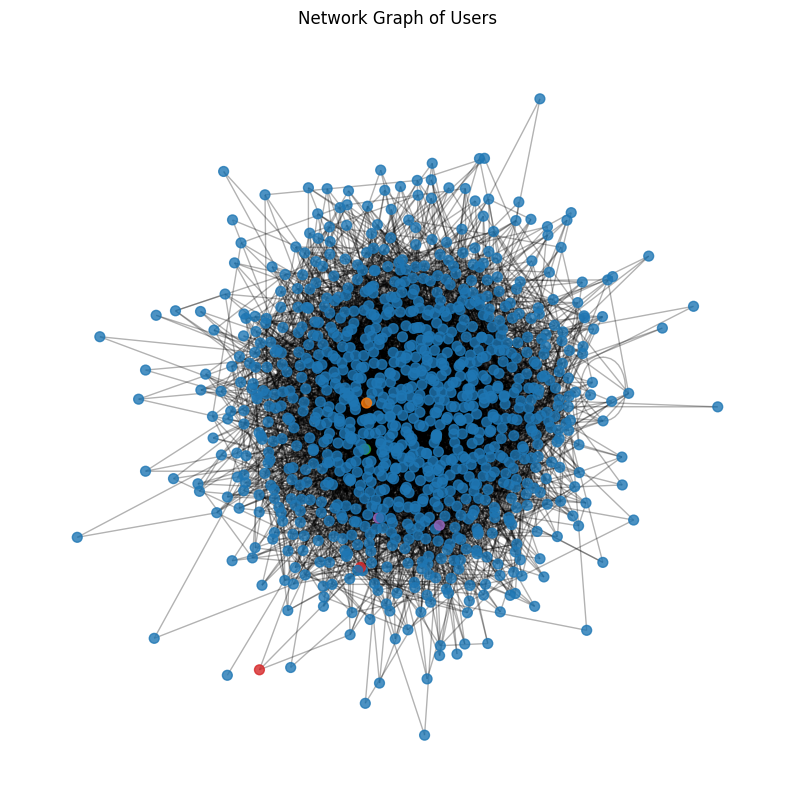

<Figure size 640x480 with 0 Axes>

In [ ]:
import networkx as nx

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A)

# Map numerical indices back to user IDs
mapping = dict(zip(range(len(all_user_ids)), all_user_ids))
G = nx.relabel_nodes(G, mapping)

# Prepare colors for the clusters
# Assuming 'clusters' is an array or list containing the cluster assignment for each user ID in order of 'all_user_ids'
colors = [f'C{cluster}' for cluster in clusters]

# Draw the graph
plt.figure(figsize=(10, 10))
# Positions for all nodes using one of the layout algorithms
pos = nx.spring_layout(G)
# Draw nodes with color and size settings
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=50, alpha=0.8)
# Draw edges lightly
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title('Network Graph of Users')
 # Turn off the axis
plt.axis('off')
plt.show()
plt.savefig('graph.png')